In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting untuk membuat angka mudah dibaca di display
pd.options.display.float_format = '{:20.2f}'.format

# Menampilkan semua kolom pada output
pd.set_option('display.max_columns', None)

# Data Exploration

In [2]:
df = pd.read_excel("../data/online_retail_II.xlsx", sheet_name=0) # sheet name buat ngebaca bab 1 aja (file asli excel ada 2 bab yaitu 2009-2010 dan 2010-2011)

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


Berdasarkan gambaran besar yang kita lakukan disini, ada beberapa hal yang bikin janggal:

- Nilai min pada `Quantity` bernilai negatif yang dimana itu cukup aneh untuk sekilas, karena kita berekspektasi untuk positif

- Nilai min pada `Price` juga bernilai negatif

- Jumlah `Customer ID` yang jumlahnya kurang dibandingkan dengan kolom lainnya

Kita akan investigasi itu kedepannya

In [5]:
df.describe(include='O') # Mendapatkan deskripsi untuk objek data type (string)

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


Hmm, kalau diliat liat, pada tabel tersebut, untuk data pertama hingga ke empat keliatan aneh sekali. Disitu `Price` = 0 dan `Quantity` bernilai negatif. Lalu beberapa data meskipun disitu keliatan ada `Description` yang legit, namun kita tidak bisa secara effective mengetahui siapa `Customer ID` yang membeli ini. 

Kemungkinan besar strategi kita saat ini adalah untuk menghapus `Customer ID` yang hilang/kosong

In [7]:
df[df["Quantity"]< 0].head(10) # Penasaran dengan apa sih nilai negatif pada data ini

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


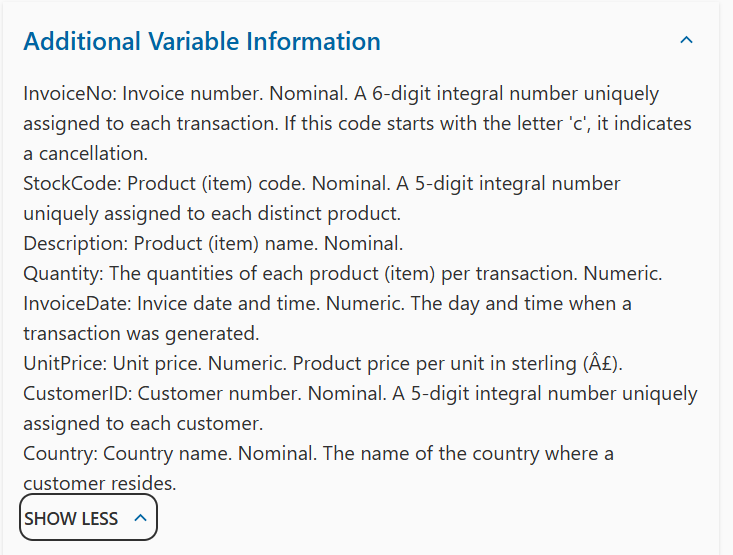
> Ternyata kalau kita lihat deskripsi pada data asli ini, maka dapat diketahui bahwa kode unik C berarti Cancellation

Cukup menarik untuk di tinjau lebih lanjut

In [8]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False] # Maksud kodingan ini adalah, kita ingin "matching", jadi kita ingin dalam kasus ini, data kolom Invoice hanya menampilkan 6digit saja tanpa lebih tanpa kurang. Bener bener digit sebanyak 6 karakter. Nah karena False berarti selain itu

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [9]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique() # Maksudnya yaitu "Tolong hapus semua ANGKA di kolom Invoice, lalu tunjukkan sisa HURUF/SIMBOL apa saja yang tertinggal." / Regex itu pencarian berdasarkan pola yaa

array(['', 'C', 'A'], dtype=object)

In [10]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


Aman untuk dibersihkan sajaa, karena dari deskripsi nya dan juga harganyaa tidak masuk akal

Tapi ini maksudnyaa apaa?? 

di dunia bisnis/akuntansi, ini adalah hal yang sangat nyata dan penting.

Nama resminya di dunia nyata (Akuntansi/Bisnis) adalah **"Bad Debt Write-off"** atau dalam bahasa Indonesia **"Penghapusan Piutang Tak Tertagih"**.

### Cerita Kasus "Bad Debt"

1.  **Awal Cerita:**
    Toko mengirim barang ke pembeli besar. Karena langganan, pembeli bilang "Kirim dulu, nanti aku bayar bulan depan". Toko mencatat ini sebagai **Pendapatan (Sales)** sebesar misal £50.000.

2.  **Masalah:**
    Bulan depan datang, si pembeli tidak bayar. Bulan depannya lagi, ditagih susah. Ternyata pembelinya bangkrut atau kabur.

3.  **Realita:**
    Uang £50.000 itu **tidak akan pernah diterima** oleh toko.

4.  **Solusi Akuntansi (Adjust Bad Debt):**
    Toko tidak boleh membiarkan catatan "Pendapatan £50.000" itu ada di buku, karena nanti toko harus bayar pajak atas uang yang tidak pernah mereka terima.
    
    Makanya, bagian keuangan membuat **entri manual** (seperti yang kamu lihat di data itu):
    *   **Description:** "Adjust bad debt" (Koreksi utang macet).
    *   **Price:** Dibuat **Negatif** (misal -53594.36) untuk "membatalkan" atau "mengurangi" total pendapatan toko secara keseluruhan.
    *   **StockCode 'B':** Kemungkinan kode manual untuk 'Bad Debt'.

### Kenapa datanya aneh?
*   **Quantity 1 tapi Harga Minus:** Ini cuma cara orang keuangan memasukkan data ke sistem. Mereka butuh satu baris transaksi (Qty 1) yang nilainya minus besar untuk menyeimbangkan pembukuan.
*   **Customer ID NaN:** Karena ini seringkali tindakan "pembersihan buku" di akhir bulan/tahun oleh akuntan, mereka mungkin tidak memasukkannya ke akun customer spesifik, tapi sebagai kerugian umum toko.

**Kesimpulan:**
Itu adalah catatan **Kerugian Toko** akibat di-PHP-in (tidak dibayar) oleh pembeli yang utangnya macet.

In [ ]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False)] #buang yang Barang Normal (5 angka) aja. Sisanya tampilin semua.

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


> StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 

itu adalah katanya deskripsi yang disediakan oleh distributor, sehingga disini ada tidak kecocokan dengan dokumentasi data. Namun kalau dicek, sepertinya ini aman aman aja deh, tapi perlu untuk dicek lebih dalam


In [ ]:
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)] # buang Barang Normal (5 angka), DAN  buang juga Barang Variasi (5 angka + huruf).


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.00,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [14]:
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()


array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [15]:
df[df["StockCode"].str.contains("DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [16]:
# Simpan kode-kode aneh tadi ke dalam variabel biar gampang
kode_aneh = df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

# Kita filter data cuma yang kodenya aneh, lalu kita lihat Description-nya
# .value_counts() biar sekalian tau mana yang paling sering muncul
df[df["StockCode"].isin(kode_aneh)].groupby(["StockCode", "Description"]).size().reset_index(name='Jumlah Muncul').sort_values(by='Jumlah Muncul', ascending=False)

,StockCode,Description,Jumlah Muncul
32,POST,POSTAGE,862
30,M,Manual,850
29,DOT,DOTCOM POSTAGE,735
9,C2,CARRIAGE,136
10,D,Discount,100
8,BANK CHARGES,Bank Charges,59
33,S,SAMPLES,41
2,ADJUST,Adjustment by john on 26/01/2010 16,38
16,DCGS0058,MISO PRETTY GUM,30
3,ADJUST,Adjustment by john on 26/01/2010 17,26


In [ ]:
# Kodingan ini murni dari ai, saya hanya menyuruh dia untuk membuat kodingan agar bisa memberikan output yang saya inginkan.

# 1. Ambil lagi daftar kode aneh tadi
kode_aneh = df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

# 2. Filter data cuma yang kode aneh
df_aneh = df[df["StockCode"].isin(kode_aneh)]

# 3. Kita Groupby untuk menghitung statistik Customer ID-nya
cek_customer = df_aneh.groupby("StockCode").agg(
    Total_Transaksi=('Invoice', 'count'),          # Hitung total baris
    Ada_CustomerID=('Customer ID', 'count'),       # Hitung yang ID-nya TIDAK NaN
    CustomerID_NaN=('Customer ID', lambda x: x.isna().sum()) # Hitung yang ID-nya NaN
).sort_values(by='Total_Transaksi', ascending=False)

# Tampilkan
cek_customer

,Total_Transaksi,Ada_CustomerID,CustomerID_NaN
StockCode,,,
POST,865,822,43
M,850,650,200
DOT,736,0,736
C2,138,125,13
D,100,97,3
ADJUST,67,61,6
BANK CHARGES,65,26,39
S,41,0,41
DCGS0058,31,0,31


In [19]:
# Daftar kode yang bikin kamu penasaran
kode_penasaran = ['POST', 'M', 'DOT', 'C2', 'D', 'ADJUST', 'BANK CHARGES', 'S', 'DCGS0058']

# Loop untuk cek satu per satu
for kode in kode_penasaran:
    print(f"==================================================")
    print(f"👀 MENGINTIP ISI STOCK CODE: {kode}")
    print(f"==================================================")
    
    # Ambil data yang stockcode-nya sesuai
    data_intip = df[df['StockCode'] == kode]
    
    # Tampilkan 10 baris pertama saja biar gak penuh layarnya
    display(data_intip.head(10))
    
    # Kasih jarak enter biar enak bacanya
    print("\n")

👀 MENGINTIP ISI STOCK CODE: POST


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.00,United Kingdom
1244,489557,POST,POSTAGE,4,2009-12-01 12:52:00,18.00,12490.00,France
3451,C489685,POST,POSTAGE,-1,2009-12-02 10:28:00,18.00,12523.00,France
6406,489883,POST,POSTAGE,3,2009-12-02 16:24:00,18.00,12437.00,France
9103,C490117,POST,POSTAGE,-1,2009-12-03 17:38:00,2.99,16570.00,United Kingdom
9153,C490120,POST,POSTAGE,-2,2009-12-03 17:52:00,18.00,14277.00,France




👀 MENGINTIP ISI STOCK CODE: M


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.00,United Kingdom
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.00,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.00,United Kingdom
11310,490300,M,Manual,1,2009-12-04 14:19:00,0.85,12970.00,United Kingdom
11311,490300,M,Manual,1,2009-12-04 14:19:00,0.21,12970.00,United Kingdom
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.00,17231.00,United Kingdom
17273,C490748,M,Manual,-1,2009-12-07 18:14:00,309.73,12748.00,United Kingdom
17386,490760,M,Manual,1,2009-12-08 09:49:00,10.00,14295.00,United Kingdom




👀 MENGINTIP ISI STOCK CODE: DOT


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
2644,489604,DOT,DOTCOM POSTAGE,1,2009-12-01 14:47:00,50.87,NaN,United Kingdom
2686,489607,DOT,DOTCOM POSTAGE,1,2009-12-01 14:49:00,76.30,NaN,United Kingdom
2698,489609,DOT,DOTCOM POSTAGE,1,2009-12-01 14:50:00,74.61,NaN,United Kingdom
2771,489612,DOT,DOTCOM POSTAGE,1,2009-12-01 14:55:00,87.39,NaN,United Kingdom
2806,489614,DOT,DOTCOM POSTAGE,1,2009-12-01 14:56:00,80.30,NaN,United Kingdom




👀 MENGINTIP ISI STOCK CODE: C2


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
9292,490127,C2,CARRIAGE,1,2009-12-03 18:13:00,50.00,14156.00,EIRE
14481,490541,C2,CARRIAGE,1,2009-12-07 09:25:00,50.00,NaN,EIRE
14502,490542,C2,CARRIAGE,1,2009-12-07 09:42:00,50.00,14911.00,EIRE
19541,490998,C2,CARRIAGE,1,2009-12-08 17:24:00,50.00,16253.00,United Kingdom
22803,491160,C2,CARRIAGE,1,2009-12-10 10:29:00,50.00,14911.00,EIRE
27494,491702,C2,CARRIAGE,1,2009-12-13 13:53:00,50.00,NaN,EIRE
32207,491990,C2,NaN,100,2009-12-15 10:06:00,0.00,NaN,United Kingdom
32964,492092,C2,CARRIAGE,1,2009-12-15 14:03:00,50.00,14156.00,EIRE
34330,492250,C2,CARRIAGE,1,2009-12-16 10:45:00,50.00,18286.00,United Kingdom
39877,492746,C2,CARRIAGE,1,2009-12-18 13:01:00,50.00,NaN,EIRE




👀 MENGINTIP ISI STOCK CODE: D


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
736,C489535,D,Discount,-1,2009-12-01 12:11:00,19.00,15299.00,United Kingdom
24675,C491428,D,Discount,-1,2009-12-10 20:23:00,9.10,15494.00,United Kingdom
29414,C491845,D,Discount,-1,2009-12-14 14:54:00,1.59,NaN,United Kingdom
29958,C491962,D,Discount,-1,2009-12-14 16:38:00,0.59,13206.00,United Kingdom
39127,C492693,D,Discount,-1,2009-12-17 18:47:00,6.85,13408.00,United Kingdom
44782,C493373,D,Discount,-1,2009-12-23 11:22:00,64.37,15044.00,United Kingdom
62231,C494909,D,Discount,-30,2010-01-19 16:45:00,0.40,12931.00,United Kingdom
62232,C494909,D,Discount,-30,2010-01-19 16:45:00,0.13,12931.00,United Kingdom
62962,C494984,D,Discount,-1,2010-01-20 11:12:00,70.00,17949.00,United Kingdom




👀 MENGINTIP ISI STOCK CODE: ADJUST


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
70975,495732,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:20:00,96.46,NaN,EIRE
70976,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.34,14911.00,EIRE
70977,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.56,12745.00,EIRE
70978,495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,205.82,14911.00,EIRE
70979,C495737,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:23:00,10.50,16154.00,United Kingdom
70980,495736,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:23:00,21.00,12606.00,Spain
70981,C495740,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:24:00,14.00,13054.00,United Kingdom
70982,C495738,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:24:00,26.25,12454.00,Spain
70983,C495739,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:24:00,10.50,15383.00,United Kingdom
70984,C495744,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:25:00,91.89,12706.00,Finland




👀 MENGINTIP ISI STOCK CODE: BANK CHARGES


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.00,16703.00,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.00,United Kingdom
33435,C492206,BANK CHARGES,Bank Charges,-1,2009-12-15 16:32:00,848.43,NaN,United Kingdom
55948,C494438,BANK CHARGES,Bank Charges,-1,2010-01-14 12:15:00,767.99,NaN,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.00,16928.00,United Kingdom
104220,C499374,BANK CHARGES,Bank Charges,-1,2010-02-26 11:55:00,467.54,NaN,United Kingdom
114180,C500319,BANK CHARGES,Bank Charges,-11,2010-03-07 12:02:00,0.96,NaN,United Kingdom
115208,C500352,BANK CHARGES,Bank Charges,-1,2010-03-07 15:08:00,11.29,NaN,United Kingdom
118558,C500708,BANK CHARGES,Bank Charges,-1,2010-03-09 13:56:00,372.30,NaN,United Kingdom
136411,C502459,BANK CHARGES,Bank Charges,-1,2010-03-24 14:25:00,39.24,NaN,United Kingdom




👀 MENGINTIP ISI STOCK CODE: S


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
114061,C500305,S,SAMPLES,-1,2010-03-07 10:59:00,73.80,NaN,United Kingdom
114083,C500309,S,SAMPLES,-1,2010-03-07 11:09:00,32.03,NaN,United Kingdom
133558,C502083,S,SAMPLES,-1,2010-03-22 15:50:00,170.37,NaN,United Kingdom
133582,C502088,S,SAMPLES,-1,2010-03-22 16:03:00,259.59,NaN,United Kingdom
136253,C502438,S,SAMPLES,-1,2010-03-24 13:11:00,605.18,NaN,United Kingdom
136259,C502442,S,SAMPLES,-1,2010-03-24 13:20:00,94.19,NaN,United Kingdom
181508,506601,S,SAMPLES,1,2010-04-30 14:49:00,73.80,NaN,United Kingdom
181509,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,3.84,NaN,United Kingdom
181510,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,3.55,NaN,United Kingdom
181511,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,77.00,NaN,United Kingdom




👀 MENGINTIP ISI STOCK CODE: DCGS0058


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom
17264,490745,DCGS0058,MISO PRETTY GUM,1,2009-12-07 18:02:00,0.83,NaN,United Kingdom
30671,491969,DCGS0058,MISO PRETTY GUM,1,2009-12-14 17:57:00,0.83,NaN,United Kingdom
31652,491970,DCGS0058,MISO PRETTY GUM,1,2009-12-14 18:03:00,0.83,NaN,United Kingdom
32045,491971,DCGS0058,MISO PRETTY GUM,2,2009-12-14 18:37:00,0.83,NaN,United Kingdom
34668,492303,DCGS0058,MISO PRETTY GUM,1,2009-12-16 11:57:00,0.83,NaN,United Kingdom
37222,492425,DCGS0058,MISO PRETTY GUM,1,2009-12-16 17:58:00,0.83,NaN,United Kingdom
40878,492782,DCGS0058,MISO PRETTY GUM,1,2009-12-18 17:06:00,0.83,NaN,United Kingdom
41260,492783,DCGS0058,MISO PRETTY GUM,2,2009-12-18 17:15:00,0.83,NaN,United Kingdom


### Stock Code

* StockCode is meant to follow the pattern `[0-9]{5}` but seems to have legit values for `[0-9]{5}[a-zA-Z]+`
    * Also contains other values:

| Code | Description | Action |
| :--- | :--- | :--- |
| **DCGS** | Looks valid, some quantities are negative though and customer ID is null | Exclude from clustering |
| **D** | Looks valid, represents discount values | Exclude from clustering |
| **DOT** | Looks valid, represents postage charges | Exclude from clustering |
| **M or m** | Looks valid, represents manual transactions | Exclude from clustering |
| **C2** | Carriage transaction - not sure what this means | Exclude from clustering |
| **C3** | Not sure, only 1 transaction | Exclude |
| **BANK CHARGES or B** | Bank charges | Exclude from clustering |
| **S** | Samples sent to customer | Exclude from clustering |
| **TESTXXX** | Testing data, not valid | Exclude from clustering |
| **gift_XXX** | Purchases with gift cards, might be interesting for another analysis, but no customer data | Exclude |
| **PADS** | Looks like a legit stock code for padding | **Include** |
| **SP1002** | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing | Exclude for now |
| **AMAZONFEE** | Looks like fees for Amazon shipping or something | Exclude for now |
| **ADJUSTX** | Looks like manual account adjustments by admins | Exclude for now |

Kenapa kok bisa seperti itu? Pada dasar apa kita menghapus atau tetap memasukan suatu kategori? 

Kembali ke tujuan utama kita pada sesi ini, yaitu : **Customer Segmentation**, kita ingin mengelompokkan orang berdasarkan **"Barang apa yang mereka suka beli"** dan **"Seberapa loyal mereka belanja barang dagangan kita"

Alasan lebih detailnya dibawah ini : 

1) Kategori "Bukan Barang Dagangan" (Ini termasuk Jasa/Logistik)
   - **Kode** `Dot` (Postage / Ongkos Kirim), `C2` (Carriage), `AMAZONFEE`
   - **Alasan Diubuang**:
     - Ini adalah biaya kirim atau biaya admin platform, yang berarti tidak ada kaitannya dengan apa yang ingin kita capai. Contoh: Kalau customer rumahnya jauh, akan menghabiskan lebih banyak uang dibandingkan dengan orang yang beli langsung. Sistem nantinya akan menganggap bahwa si customer yang alamatnya jauh ini lebih "Sultan" (Monetary tinggi). Padahal bisa saja dia beli barangnya sedikit, sedangkan yang beli langsung beli barangnya cukup banyak namun kalah secara jumlah uang yang dikeluarkan karena biaya ongkir itu tadi.
       
2) Kategori Admin/Akuntansi

    - Kode: `M` `m` (Manual), `D` (Discount), `BANK CHARGES`, `ADJUST`.
    - **Alasan Diubuang**:
      - Untuk kode `M` `m` kita tidak bisa tau barang apa yang dibeli, sehingga akan bisa menjadi "sampah" bagi data latih kita. Begitu pula dengan `BANK CHARGES` yang merupakan pemberian otomatis dari Bank bersangkutan yang tidak memiliki arti apa-apa.

Sisanyaa sudah cukup intuitive untuk diketahui mengapa perlu dihapus. Pengecualian saja untuk 

3) Kenapa `PADS` Dimasukkan (Include)?
   - Kode: PADS
   - Deskripsi: PADS TO MATCH ALL CUSHIONS.
   - Alasan Disimpan:
     - Nah, ini pengecualian unik! Walaupun kodenya aneh (huruf semua), tapi kalau dilihat deskripsinya, ini adalah Barang Fisik (Busa/Bantalan Kursi). Ini adalah produk jualan beneran yang dipilih dan dibeli customer. Jadi ini VALID mencerminkan perilaku belanja.


### Kesimpulan Strategi Si Trent (dan Kita):
Dia ingin membersihkan dataset supaya hanya menyisakan **TRANSAKSI PRODUK FISIK YANG VALID**.

Dengan begitu, nanti saat algoritma K-Means bekerja:
*   Klaster 1 = Orang yang suka beli pernak-pernik kecil.
*   Klaster 2 = Orang yang suka borong barang mahal.

Bukan jadi:
*   Klaster 1 = Orang yang rumahnya jauh (Ongkir mahal).
*   Klaster 2 = Orang yang sering kena denda Bank.